In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# 1. Load Dataset
df = pd.read_csv("/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [34]:
# 2. Clean Column Names
df.columns = df.columns.str.strip()

# Check for missing values
print(f"\nMissing values in the dataset: {df.isnull().sum().sum()}")


Missing values in the dataset: 0


In [33]:
# 3. Feature & Target Separation
X = df.drop(['url', ' shares'], axis=1)
y = df[' shares']
print(f"\nBasic statistics of the target variable '{target_column}':")
print(df[ ' shares'].describe())


Basic statistics of the target variable 'shares':
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64


In [20]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}"

Training set size: (31715, 59)
Testing set size: (7929, 59)


In [35]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Mean of first 5 scaled features: {np.mean(X_train_scaled[:, :5], axis=0)}")
print(f"Standard deviation of first 5 scaled features: {np.std(X_train_scaled[:, :5], axis=0)}")

Mean of first 5 scaled features: [-8.06543859e-17 -2.46443957e-16 -7.88620662e-17 -1.25462378e-17
  1.61308772e-17]
Standard deviation of first 5 scaled features: [1. 1. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


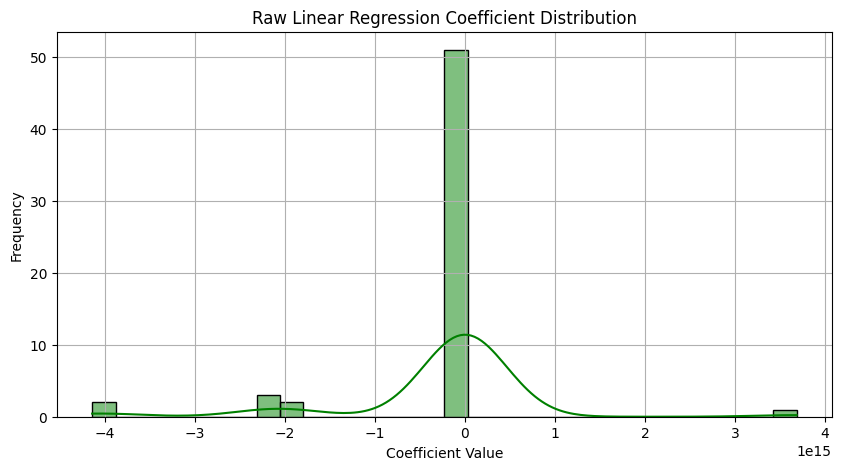

Top 10 Positive Coefficients:
                      Feature   Coefficient
37                 is_weekend  3.686993e+15
3             n_unique_tokens  1.104615e+04
26                 kw_avg_avg  2.195298e+03
19                 kw_max_min  4.391840e+02
27  self_reference_min_shares  4.059370e+02
47        rate_positive_words  4.012321e+02
2            n_tokens_content  3.832426e+02
0                   timedelta  3.796314e+02
48        rate_negative_words  3.585571e+02
28  self_reference_max_shares  3.437837e+02

Top 10 Negative Coefficients:
                 Feature   Coefficient
40                LDA_02 -3.679076e+05
42                LDA_04 -3.774736e+05
41                LDA_03 -3.836049e+05
34     weekday_is_friday -1.922263e+15
30     weekday_is_monday -2.053328e+15
33   weekday_is_thursday -2.112109e+15
31    weekday_is_tuesday -2.127278e+15
32  weekday_is_wednesday -2.129919e+15
35   weekday_is_saturday -3.963870e+15
36     weekday_is_sunday -4.143956e+15


In [16]:
from sklearn.linear_model import LinearRegression

# Train the raw linear regression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

# Get coefficients
raw_coefs = linear.coef_

# Plot coefficient distribution
plt.figure(figsize=(10,5))
sns.histplot(raw_coefs, bins=30, kde=True, color='green')
plt.title("Raw Linear Regression Coefficient Distribution")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# View top influential features (positive & negative)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': raw_coefs
}).sort_values(by='Coefficient', ascending=False)

print("Top 10 Positive Coefficients:")
print(coef_df.head(10))

print("\nTop 10 Negative Coefficients:")
print(coef_df.tail(10))


In [9]:
# 6. Alpha Values for Regularization
alphas = [0.01, 0.1, 1, 10, 100]

lasso_mse = []
ridge_mse = []
lasso_r2 = []
ridge_r2 = []
lasso_nz = []
ridge_nz = []

In [10]:
# 7. Model Training & Evaluation
for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)

    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_r2.append(r2_score(y_test, y_pred_lasso))
    lasso_nz.append(np.sum(lasso.coef_ != 0))

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)

    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    ridge_nz.append(np.sum(ridge.coef_ != 0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.995e+11, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


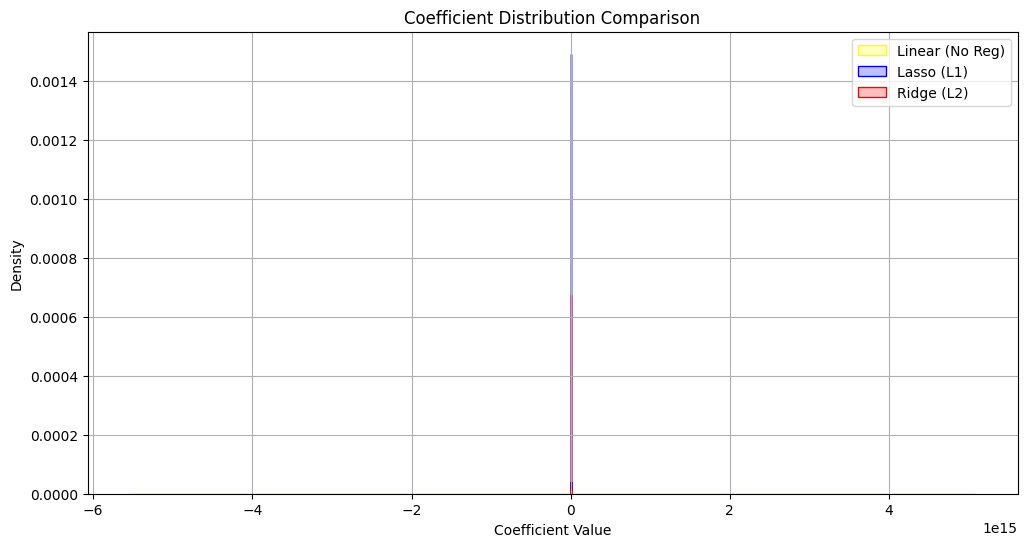

In [18]:
plt.figure(figsize=(12,6))

sns.kdeplot(raw_coefs, label='Linear (No Reg)', fill=True, color='yellow')
sns.kdeplot(lasso.coef_, label='Lasso (L1)', fill=True, color='blue')
sns.kdeplot(ridge.coef_, label='Ridge (L2)', fill=True, color='red')

plt.title("Coefficient Distribution Comparison")
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

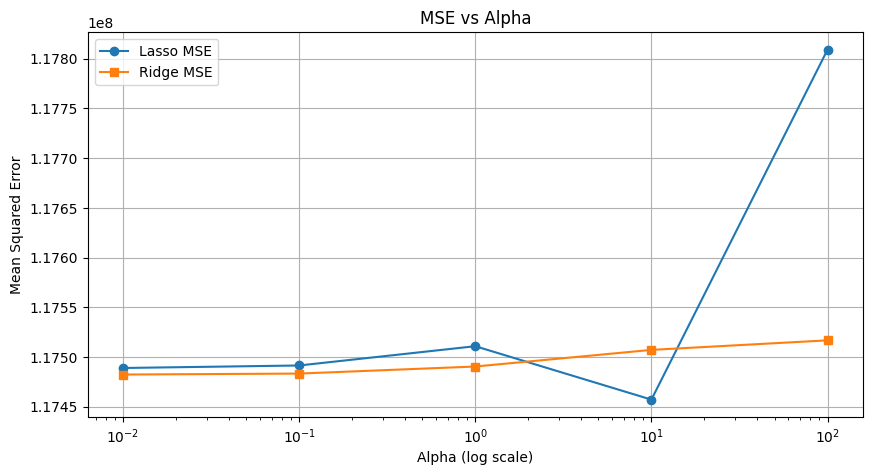

In [11]:
# 8. Plot MSE vs Alpha
plt.figure(figsize=(10,5))
plt.plot(alphas, lasso_mse, marker='o', label='Lasso MSE')
plt.plot(alphas, ridge_mse, marker='s', label='Ridge MSE')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

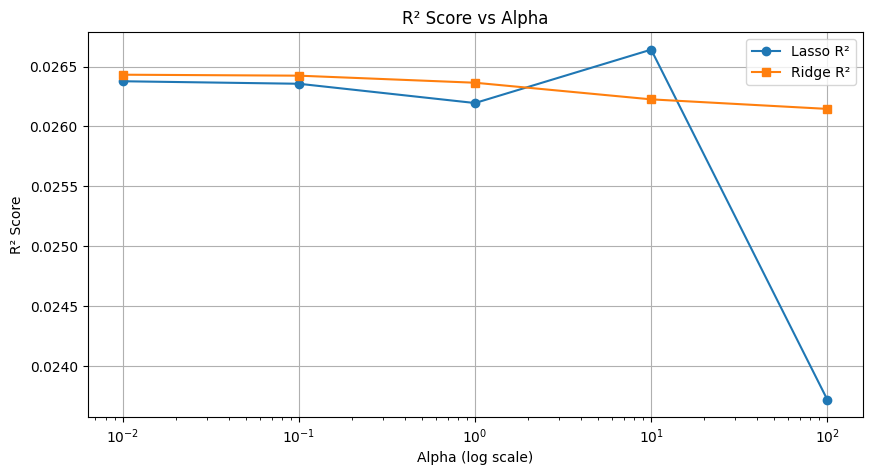

In [12]:
# 9. Plot R² vs Alpha
plt.figure(figsize=(10,5))
plt.plot(alphas, lasso_r2, marker='o', label='Lasso R²')
plt.plot(alphas, ridge_r2, marker='s', label='Ridge R²')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

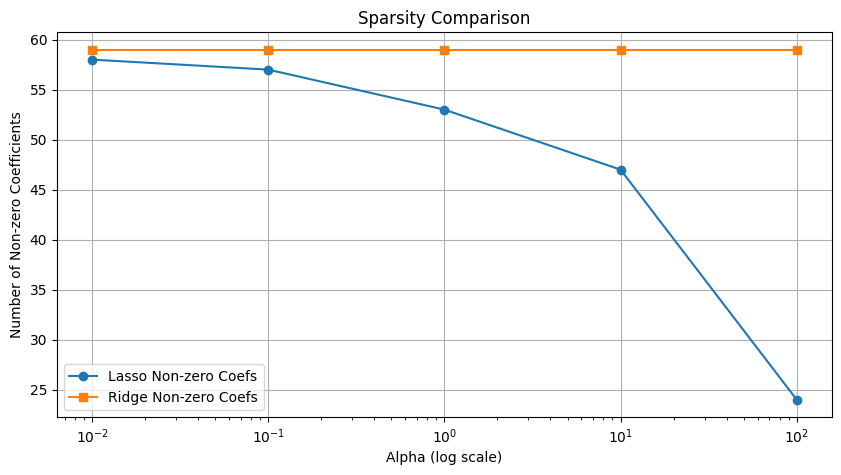

In [13]:
# 10. Plot Non-zero Coefficients vs Alpha
plt.figure(figsize=(10,5))
plt.plot(alphas, lasso_nz, marker='o', label='Lasso Non-zero Coefs')
plt.plot(alphas, ridge_nz, marker='s', label='Ridge Non-zero Coefs')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of Non-zero Coefficients")
plt.title("Sparsity Comparison")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


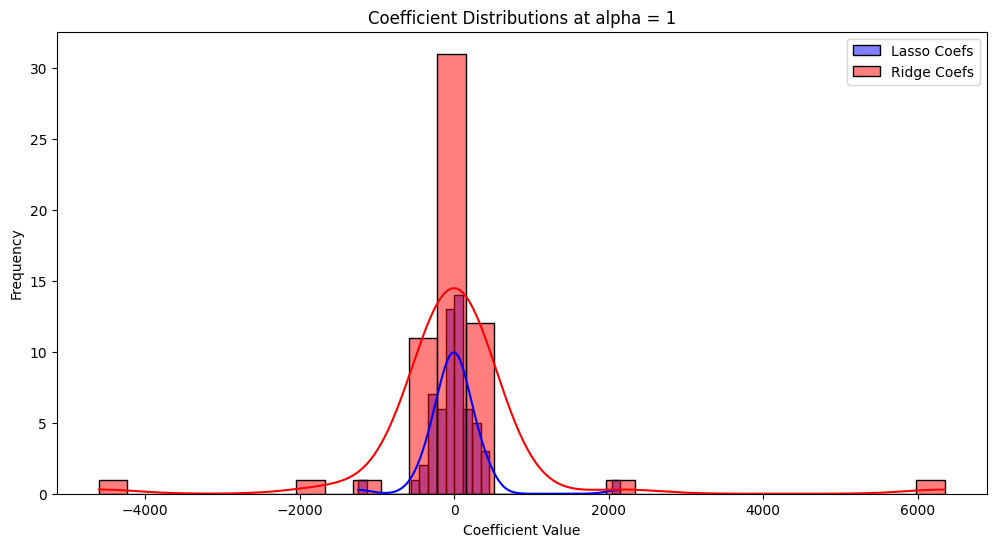

In [14]:
# 11. Coefficient Distributions at alpha = 1
lasso = Lasso(alpha=1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

plt.figure(figsize=(12,6))
sns.histplot(lasso.coef_, bins=30, color='blue', label='Lasso Coefs', kde=True)
sns.histplot(ridge.coef_, bins=30, color='red', label='Ridge Coefs', kde=True)
plt.title("Coefficient Distributions at alpha = 1")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Loading the dataset...

Dataset shape: (39644, 61)

First 5 rows of the dataset:
                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+09, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(



Lasso Regression Results:
Training MSE: 135783039.84
Testing MSE: 117556272.50
Training R²: 0.0218
Testing R²: 0.0258
Number of features used: 54
Max coefficient value: 2114.1806
Min coefficient value: -1214.4027

Random sample of coefficients for comparison:
kw_avg_min                     - LR:  -211.7328, Ridge:  -208.3004, Lasso:  -186.4589
kw_min_avg                     - LR:  -404.8990, Ridge:  -400.4999, Lasso:  -396.7453
avg_negative_polarity          - LR:  -166.5901, Ridge:  -162.3946, Lasso:  -148.1026
kw_max_max                     - LR:  -181.8053, Ridge:  -185.9619, Lasso:  -187.0121
avg_positive_polarity          - LR:  -162.4482, Ridge:  -152.8261, Lasso:  -131.0109


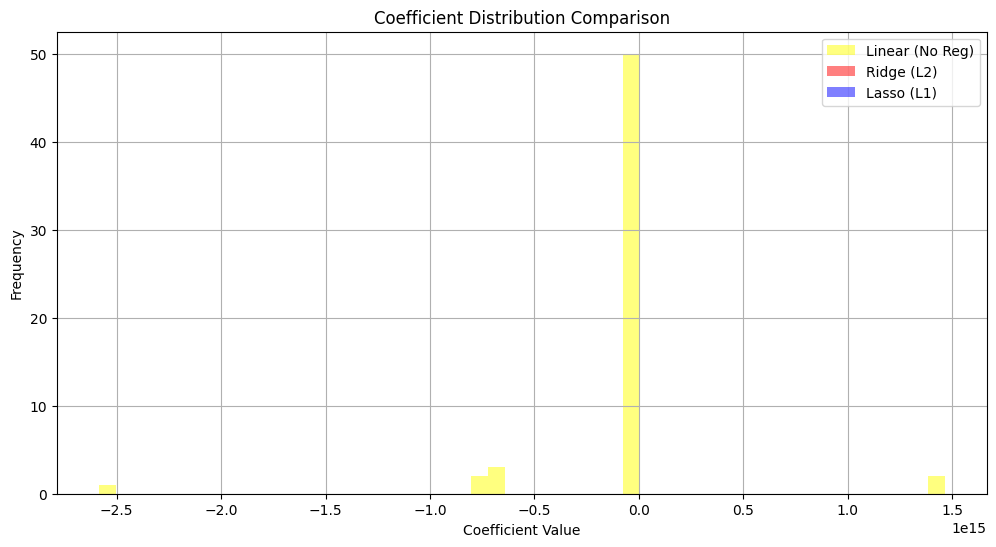

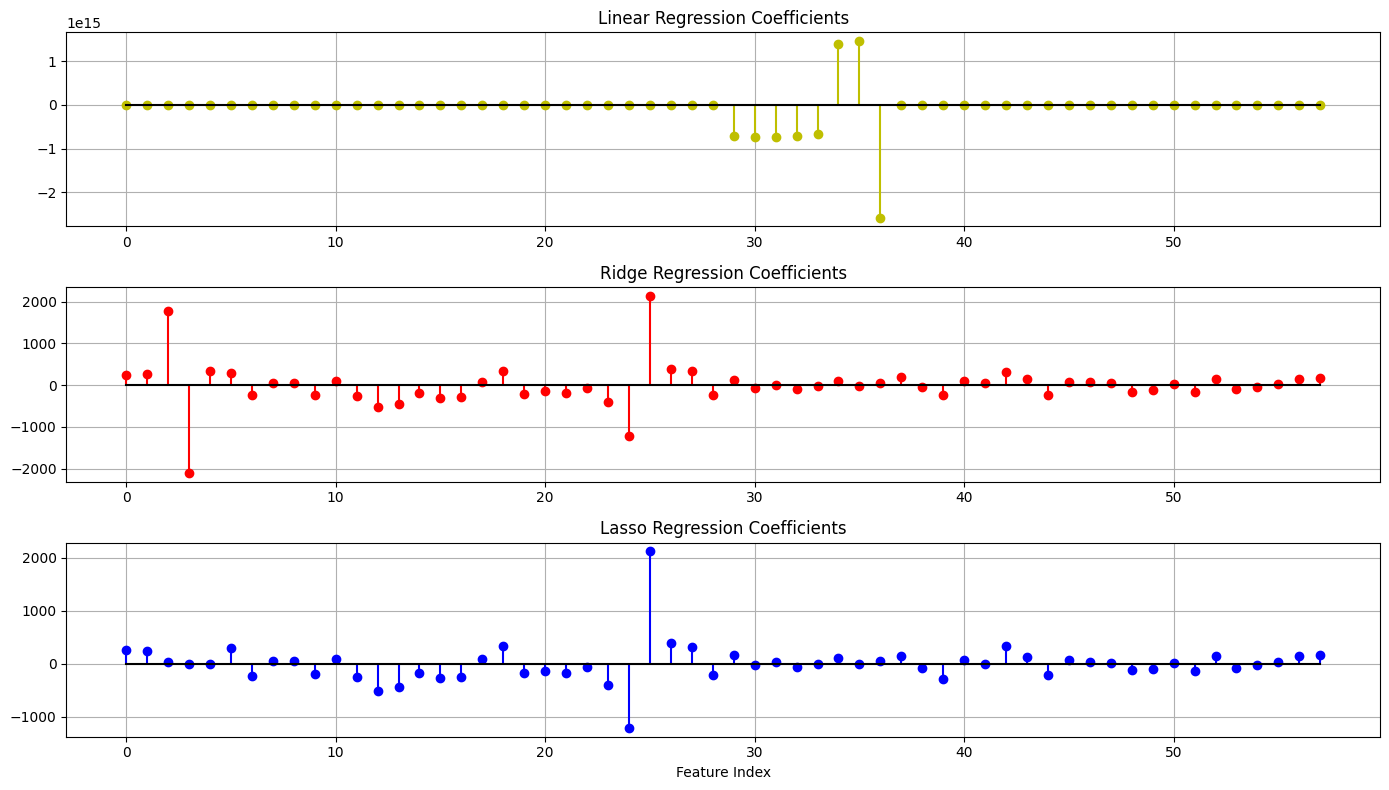

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


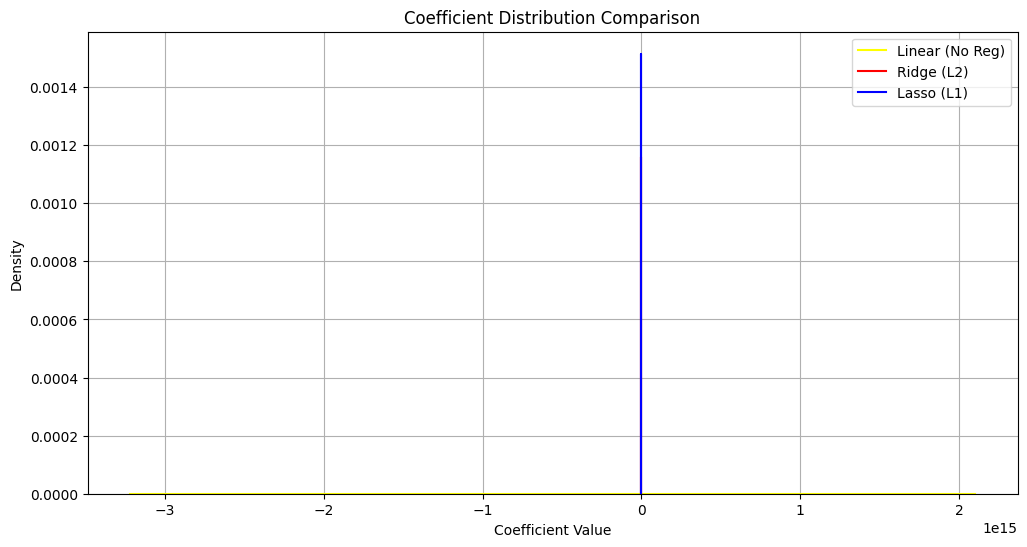

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


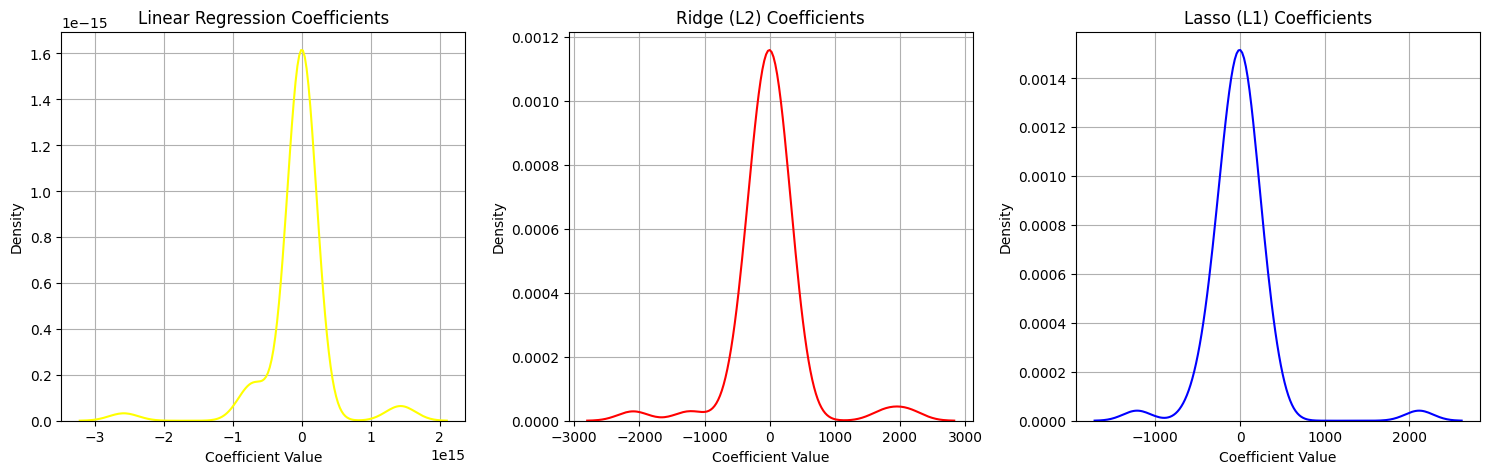


Top 10 features by importance (Linear Regression):
is_weekend                    : -2583542190272199.0000
weekday_is_sunday             : 1464080784977381.0000
weekday_is_saturday           : 1400455336723071.0000
weekday_is_wednesday          : -727248857031782.6250
weekday_is_tuesday            : -726347198974783.5000
weekday_is_thursday           : -721167613435671.2500
weekday_is_monday             : -701097215601828.8750
weekday_is_friday             : -656346050293965.5000
LDA_03                        : -292310.5829
LDA_04                        : -287647.7527

Top 10 features by importance (Ridge Regression):
kw_avg_avg                    : 2127.3541
n_non_stop_words              : -2095.2078
n_unique_tokens               : 1780.0832
kw_max_avg                    : -1226.3286
data_channel_is_entertainment : -523.3574
data_channel_is_bus           : -460.8650
kw_min_avg                    : -400.4999
self_reference_min_shares     : 396.3449
kw_max_min                    : 351.1

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
print("Loading the dataset...")
df = pd.read_csv("/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")

# Display basic information about the dataset
print(f"\nDataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# From the output we can see that the actual column name includes a space
# The target column is ' shares' with a space prefix, not 'shares'
target_column = ' shares'  # Note the space before 'shares'

print(f"\nBasic statistics of the target variable '{target_column}':")
print(df[target_column].describe())

# Data preprocessing
# Fix column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()
print("\nColumn names after stripping spaces:")
print(df.columns.tolist())

# Now the target column is 'shares' without the space
target_column = 'shares'

# Remove non-predictive columns
print("\nRemoving non-predictive columns...")
# Dropping URL and timedelta columns as they're not useful for prediction
df = df.drop(['url', 'timedelta'], axis=1)

# Check for missing values
print(f"\nMissing values in the dataset: {df.isnull().sum().sum()}")

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"\nNumber of features: {X.shape[1]}")
print(f"Some feature names: {list(X.columns)[:5]}")

# Split the data into training and testing sets
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Scale features
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print some stats about scaled data
print(f"Mean of first 5 scaled features: {np.mean(X_train_scaled[:, :5], axis=0)}")
print(f"Standard deviation of first 5 scaled features: {np.std(X_train_scaled[:, :5], axis=0)}")

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Training MSE: {train_mse:.2f}")
    print(f"Testing MSE: {test_mse:.2f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    
    # Print some coefficient statistics
    if hasattr(model, 'coef_'):
        print(f"Number of features used: {np.sum(model.coef_ != 0)}")
        print(f"Max coefficient value: {np.max(model.coef_):.4f}")
        print(f"Min coefficient value: {np.min(model.coef_):.4f}")
    
    return model.coef_ if hasattr(model, 'coef_') else None

# Train models with different regularization techniques
print("\nTraining Linear Regression (No Regularization)...")
lr = LinearRegression()
lr_coef = train_and_evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test, "Linear Regression")

print("\nTraining Ridge Regression (L2 Regularization)...")
ridge = Ridge(alpha=10.0, random_state=42)
ridge_coef = train_and_evaluate_model(ridge, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")

print("\nTraining Lasso Regression (L1 Regularization)...")
lasso = Lasso(alpha=1.0, random_state=42)
lasso_coef = train_and_evaluate_model(lasso, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")

# Print a random sample of coefficients for comparison
random_features = np.random.choice(range(X.shape[1]), 5, replace=False)
print("\nRandom sample of coefficients for comparison:")
for i, feature_idx in enumerate(random_features):
    feature_name = X.columns[feature_idx]
    print(f"{feature_name[:30]:30} - LR: {lr_coef[feature_idx]:10.4f}, Ridge: {ridge_coef[feature_idx]:10.4f}, Lasso: {lasso_coef[feature_idx]:10.4f}")

# Visualize coefficient distributions
plt.figure(figsize=(12, 6))
plt.hist(lr_coef, bins=50, alpha=0.5, label='Linear (No Reg)', color='yellow')
plt.hist(ridge_coef, bins=50, alpha=0.5, label='Ridge (L2)', color='red')
plt.hist(lasso_coef, bins=50, alpha=0.5, label='Lasso (L1)', color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Coefficient Distribution Comparison')
plt.legend()
plt.grid(True)
plt.savefig('coef_histogram.png')
plt.show()

# Visualize coefficient values with a better visualization
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.stem(lr_coef, linefmt='y-', markerfmt='yo', basefmt='k-')
plt.title('Linear Regression Coefficients')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(ridge_coef, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title('Ridge Regression Coefficients')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(lasso_coef, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.grid(True)

plt.tight_layout()
plt.savefig('coef_comparison.png')
plt.show()

# Visualize coefficient density plots - better than the simple histogram
plt.figure(figsize=(12, 6))
sns.kdeplot(lr_coef, label='Linear (No Reg)', color='yellow')
sns.kdeplot(ridge_coef, label='Ridge (L2)', color='red')
sns.kdeplot(lasso_coef, label='Lasso (L1)', color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.title('Coefficient Distribution Comparison')
plt.legend()
plt.grid(True)
plt.savefig('coef_density.png')
plt.show()

# For a better visualization of the coefficient distribution differences
# (This should fix the extreme scales issue you were seeing)
plt.figure(figsize=(15, 5))

# Add a subplot for each model with appropriate scale
plt.subplot(1, 3, 1)
sns.kdeplot(lr_coef, color='yellow')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.kdeplot(ridge_coef, color='red')
plt.title('Ridge (L2) Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.kdeplot(lasso_coef, color='blue')
plt.title('Lasso (L1) Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True)

plt.tight_layout()
plt.savefig('coef_density_separate.png')
plt.show()

# Feature importance analysis
# Get top 10 features by absolute coefficient value for each model
def get_top_features(coef, feature_names, n=10):
    # Get the indices of the top n coefficients by absolute value
    top_indices = np.argsort(np.abs(coef))[-n:]
    # Return feature names and coefficient values
    return [(feature_names[i], coef[i]) for i in reversed(top_indices)]

print("\nTop 10 features by importance (Linear Regression):")
for feature, coef in get_top_features(lr_coef, X.columns, 10):
    print(f"{feature[:30]:30}: {coef:.4f}")

print("\nTop 10 features by importance (Ridge Regression):")
for feature, coef in get_top_features(ridge_coef, X.columns, 10):
    print(f"{feature[:30]:30}: {coef:.4f}")

print("\nTop 10 features by importance (Lasso Regression):")
for feature, coef in get_top_features(lasso_coef, X.columns, 10):
    print(f"{feature[:30]:30}: {coef:.4f}")

# Count number of zero coefficients in each model
print("\nNumber of zero coefficients (feature selection):")
print(f"Linear Regression: {np.sum(np.abs(lr_coef) < 1e-10)}")
print(f"Ridge Regression: {np.sum(np.abs(ridge_coef) < 1e-10)}")
print(f"Lasso Regression: {np.sum(np.abs(lasso_coef) < 1e-10)}")